In [37]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [41]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name']
dataset = pd.read_csv(url, names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,NaN
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,NaN
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,NaN
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,NaN
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,NaN


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car Name      0 non-null      float64
dtypes: float64(6), int64(3)
memory usage: 28.1 KB


In [39]:
dataset = dataset.dropna()

In [61]:

one_hot_encoded_data = pd.get_dummies(dataset, columns = ['Origin'])

one_hot_encoded_data = one_hot_encoded_data.drop(columns=['Car Name'])
one_hot_encoded_data=one_hot_encoded_data.dropna()
print(one_hot_encoded_data)

      MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     Model Year  Origin_1  Origin_2  Origin_3  
0            70      True     False     False  
1            70      True     False    

In [62]:

features=one_hot_encoded_data[[ 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year','Origin_1', 'Origin_2', 'Origin_3']]
target=one_hot_encoded_data[['MPG']]


In [63]:
features.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_1,Origin_2,Origin_3
0,8,307.0,130.0,3504.0,12.0,70,True,False,False
1,8,350.0,165.0,3693.0,11.5,70,True,False,False
2,8,318.0,150.0,3436.0,11.0,70,True,False,False
3,8,304.0,150.0,3433.0,12.0,70,True,False,False
4,8,302.0,140.0,3449.0,10.5,70,True,False,False


In [64]:
target.head()

,MPG
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [65]:

x_train, x_test,y_train,y_test = train_test_split(
    features, target, test_size=0.33, random_state=42)

In [66]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)



In [67]:
print(x_train)

[[-0.88631438 -0.82964316 -0.46684422 ...  0.73564697 -0.41187724
  -0.50952467]
 [-0.88631438 -0.8773238  -0.51883707 ... -1.35934767  2.42790791
  -0.50952467]
 [-0.88631438 -0.743818    0.15707001 ... -1.35934767  2.42790791
  -0.50952467]
 ...
 [-0.88631438 -0.45773416 -0.54483349 ...  0.73564697 -0.41187724
  -0.50952467]
 [-0.88631438 -0.96314895 -1.06476201 ...  0.73564697 -0.41187724
  -0.50952467]
 [ 1.42427634  1.91676177  1.1449342  ...  0.73564697 -0.41187724
  -0.50952467]]


In [191]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten,Dropout,Reshape
model = tf.keras.models.Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=(x_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),

    Dense(1)
])



In [192]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['MAE'])

history = model.fit(x_train, y_train, epochs=800, batch_size=64)


Epoch 1/800
5/5 [==============================] - 1s 7ms/step - loss: 625.5992 - MAE: 23.6781
Epoch 2/800
5/5 [==============================] - 0s 6ms/step - loss: 619.3062 - MAE: 23.5563
Epoch 3/800
5/5 [==============================] - 0s 6ms/step - loss: 615.1873 - MAE: 23.4667
Epoch 4/800
5/5 [==============================] - 0s 6ms/step - loss: 610.5765 - MAE: 23.3694
Epoch 5/800
5/5 [==============================] - 0s 6ms/step - loss: 600.9788 - MAE: 23.1488
Epoch 6/800
5/5 [==============================] - 0s 6ms/step - loss: 576.5306 - MAE: 22.6097
Epoch 7/800
5/5 [==============================] - 0s 6ms/step - loss: 533.0650 - MAE: 21.6601
Epoch 8/800
5/5 [==============================] - 0s 6ms/step - loss: 432.6887 - MAE: 18.7802
Epoch 9/800
5/5 [==============================] - 0s 6ms/step - loss: 267.5447 - MAE: 13.6664
Epoch 10/800
5/5 [==============================] - 0s 6ms/step - loss: 276.0084 - MAE: 12.9855
Epoch 11/800
5/5 [==============================]

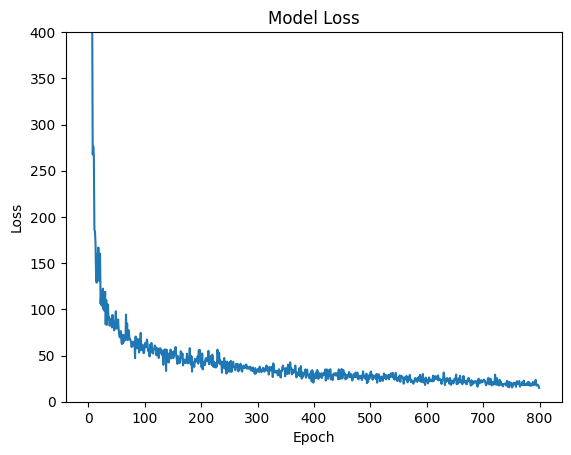

In [193]:
#Plot the Loss from the history..
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim(0, 400)
plt.show()

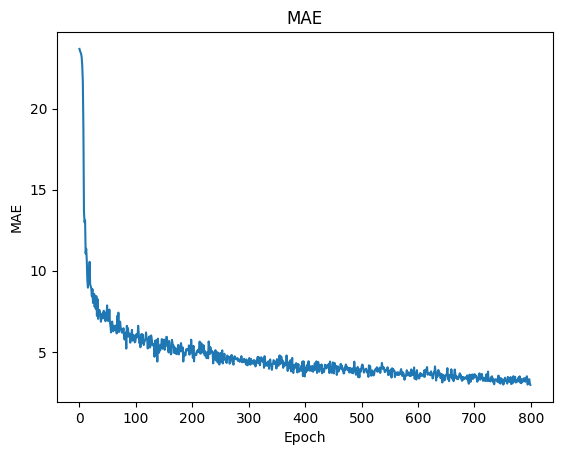

In [197]:
plt.plot(history.history['MAE'])
plt.title('MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.show()

In [185]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 5ms/step - loss: 20.8279 - MAE: 3.7413


[20.82794761657715, 3.7412853240966797]